## Final Project Submission

Please fill out:
* Student name: APIYO JOSELINE ODHIAMBO
* Student pace: part time 
* Scheduled project review date/time: 03.06.2024
* Instructor name: SAMUEL G. MWANGI
* Blog post URL: https://github.com/Jodhiamboapiyo/Phase_one_project_dsc.git


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import seaborn as sns

Importing the bom.movie_gross.csv

In [25]:
df = pd.read_csv('bom.movie_gross.csv')
df


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [26]:
df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [27]:
df.count()

title             3387
studio            3382
domestic_gross    3359
foreign_gross     2037
year              3387
dtype: int64

Checking For Duplicates and Missing Data in the Dataset

In [28]:
df.duplicated().value_counts()

False    3387
dtype: int64

In [29]:
df.isna()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [30]:
# code here
num_rows = df.shape[0]
num_missing = num_rows - df.count()
num_missing

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Checking The percentage of Missing Date in the foreign_gross column

In [31]:
# Calculating the number of missing values in foreign_gross
missing_foreign_gross = df['foreign_gross'].isnull().sum()

# Calculating the total number of rows in the DataFrame
total_rows = df.shape[0]

# Calculating the percentage of missing values
percentage_missing_foreign_gross = (missing_foreign_gross / total_rows) * 100

print(f'Percentage of missing values in foreign_gross: {percentage_missing_foreign_gross:.2f}%')

Percentage of missing values in foreign_gross: 39.86%


In [35]:
# Converting 'foreign_gross' to numeric, coercing errors to NaN
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

# Calculating the mean of 'foreign_gross'
mean_foreign_gross = df['foreign_gross'].mean()

# Filling missing values with the calculated mean
df['foreign_gross'].fillna(mean_foreign_gross, inplace=True)

# Verifying that there are no more missing values
missing_values_count = df['foreign_gross'].isnull().sum()
percentage_missing = (missing_values_count / len(df)) * 100

print(f"Number of missing values in foreign_gross after filling: {missing_values_count}")  # Should be 0
print(f"Percentage of missing values in foreign_gross after filling: {percentage_missing:.2f}%")  # Should be 0.00%

Number of missing values in foreign_gross after filling: 0
Percentage of missing values in foreign_gross after filling: 0.00%


In [36]:
df['foreign_gross']

0       6.520000e+08
1       6.913000e+08
2       6.643000e+08
3       5.357000e+08
4       5.139000e+08
            ...     
3382    7.505704e+07
3383    7.505704e+07
3384    7.505704e+07
3385    7.505704e+07
3386    7.505704e+07
Name: foreign_gross, Length: 3387, dtype: float64

Let us now work on the other missing data in the columns with the dataset

In [37]:
# Filling missing 'studio' with a placeholder
df['studio'].fillna('Unknown', inplace=True)

# Filling missing 'domestic_gross' with the mean or median
mean_domestic_gross = df['domestic_gross'].mean()
df['domestic_gross'].fillna(mean_domestic_gross, inplace=True)

# Verifying the change
print(df.isnull().sum())

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


In [38]:
df['domestic_gross'].describe()

count    3.387000e+03
mean     2.874585e+07
std      6.670497e+07
min      1.000000e+02
25%      1.225000e+05
50%      1.400000e+06
75%      2.874585e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [39]:
df['foreign_gross'].describe()

count    3.387000e+03
mean     7.505704e+07
std      1.065140e+08
min      6.000000e+02
25%      1.175000e+07
50%      7.505704e+07
75%      7.505704e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

VISUALIZATION

Bar plot for the top 10 most grossing movie domestically

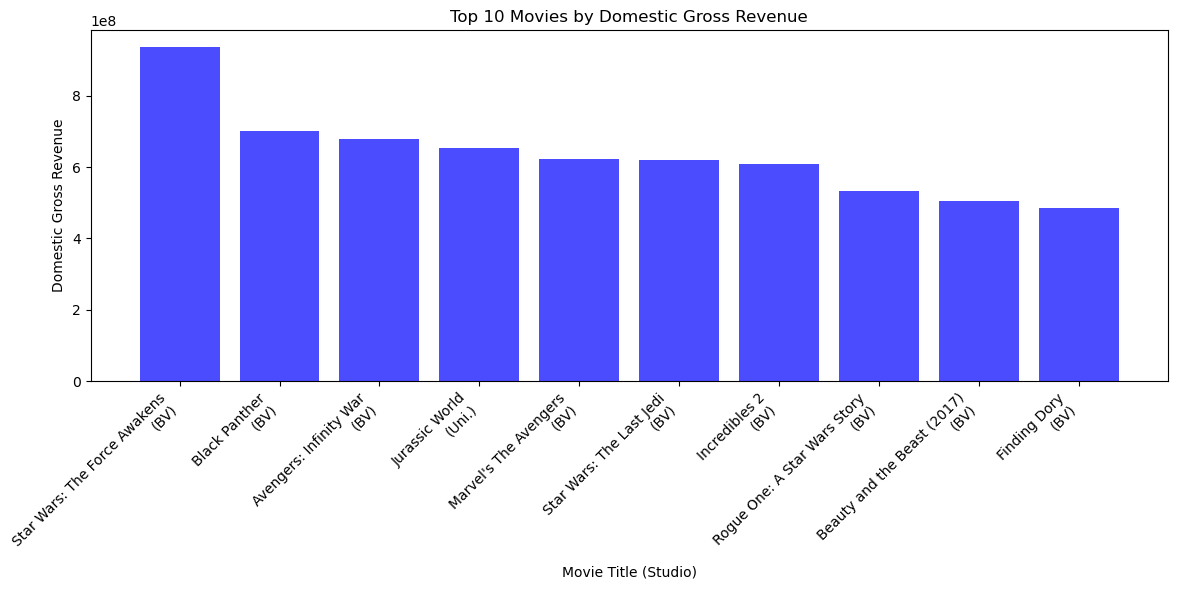

In [15]:
# Sort the DataFrame by domestic gross revenue and select the top 10 rows
top_10_domestic = df.sort_values(by='domestic_gross', ascending=False).head(10)

# Plot the comparison using a bar chart
plt.figure(figsize=(12, 6))

# Combine movie titles and studios for x-axis labels
labels = [f"{title}\n({studio})" for title, studio in zip(top_10_domestic['title'], top_10_domestic['studio'])]

plt.bar(labels, top_10_domestic['domestic_gross'], color='blue', alpha=0.7)

plt.title('Top 10 Movies by Domestic Gross Revenue')
plt.xlabel('Movie Title (Studio)')
plt.ylabel('Domestic Gross Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The total of top 10 foreign gross 

In [16]:

foreign_gross_list = []

for index, row in df.iterrows():
    # Appending the foreign gross to the list
    foreign_gross_list.append(row['foreign_gross'])

# foreign gross list to the DataFrame as a new column
df['foreign_gross'] = foreign_gross_list

# Sorted DataFrame of foreign gross in descending order
df_sorted_foreign = df.sort_values(by='foreign_gross', ascending=False)

top_10_foreign = df_sorted_foreign.head(10)

top_10_foreign = top_10_foreign[['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']]

top_10_foreign


,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018
1127,Frozen,BV,400700000.0,875700000.0,2013
2764,Wolf Warrior 2,HC,2700000.0,867600000.0,2017
1477,Transformers: Age of Extinction,Par.,245400000.0,858600000.0,2014
1876,Minions,Uni.,336000000.0,823400000.0,2015
3083,Aquaman,WB,335100000.0,812700000.0,2018
1128,Iron Man 3,BV,409000000.0,805800000.0,2013


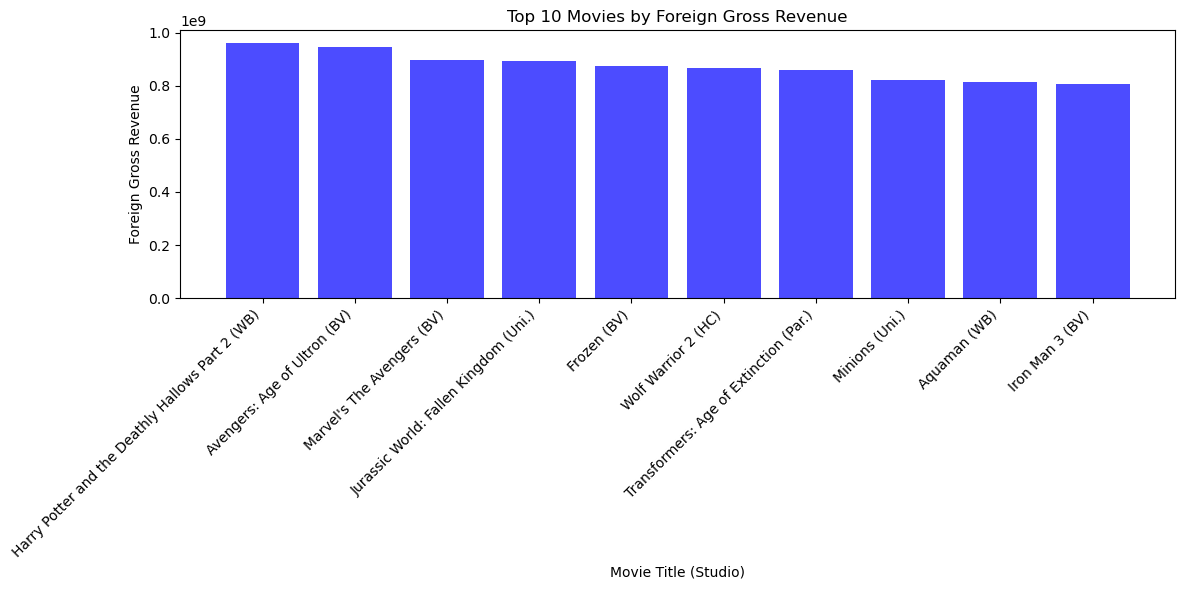

In [17]:
# Assuming the 'top_10_foreign' contains the DataFrame of the top 10 highest-grossing foreign movies
plt.figure(figsize=(12, 6))

# Initializing the lists to store movie labels and gross revenues
labels = []
gross_revenues = []

# Iterate over the rows of the DataFrame
for index, row in top_10_foreign.iterrows():
    # Combine movie title and studio for the label
    label = f"{row['title']} ({row['studio']})"
    labels.append(label)
    gross_revenues.append(row['foreign_gross'])

# Plot the bar chart
plt.bar(labels, gross_revenues, color='blue', alpha=0.7)

plt.title('Top 10 Movies by Foreign Gross Revenue')
plt.xlabel('Movie Title (Studio)')
plt.ylabel('Foreign Gross Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
# Selecting the top 10 rows, which represent the most grossing movies both domestically and foreign
top_10_grossing_movies = df_sorted_total_gross.head(10)

# Printing the top 10 grossing movies
result_df = top_10_grossing_movies[['title', 'studio', 'domestic_gross', 'foreign_gross', 'total_gross', 'year']]
print("Top 10 Grossing Movies Both Domestically and Foreign:")

result_df

Top 10 Grossing Movies Both Domestically and Foreign:


,title,studio,domestic_gross,foreign_gross,total_gross,year
727,Marvel's The Avengers,BV,623400000.0,895500000.0,1.518900e+09,2012
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,1.405400e+09,2015
3080,Black Panther,BV,700100000.0,646900000.0,1.347000e+09,2018
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,1.341500e+09,2011
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,1.332600e+09,2017
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,1.309500e+09,2018
1127,Frozen,BV,400700000.0,875700000.0,1.276400e+09,2013
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,1.263500e+09,2017
3082,Incredibles 2,BV,608600000.0,634200000.0,1.242800e+09,2018
1128,Iron Man 3,BV,409000000.0,805800000.0,1.214800e+09,2013


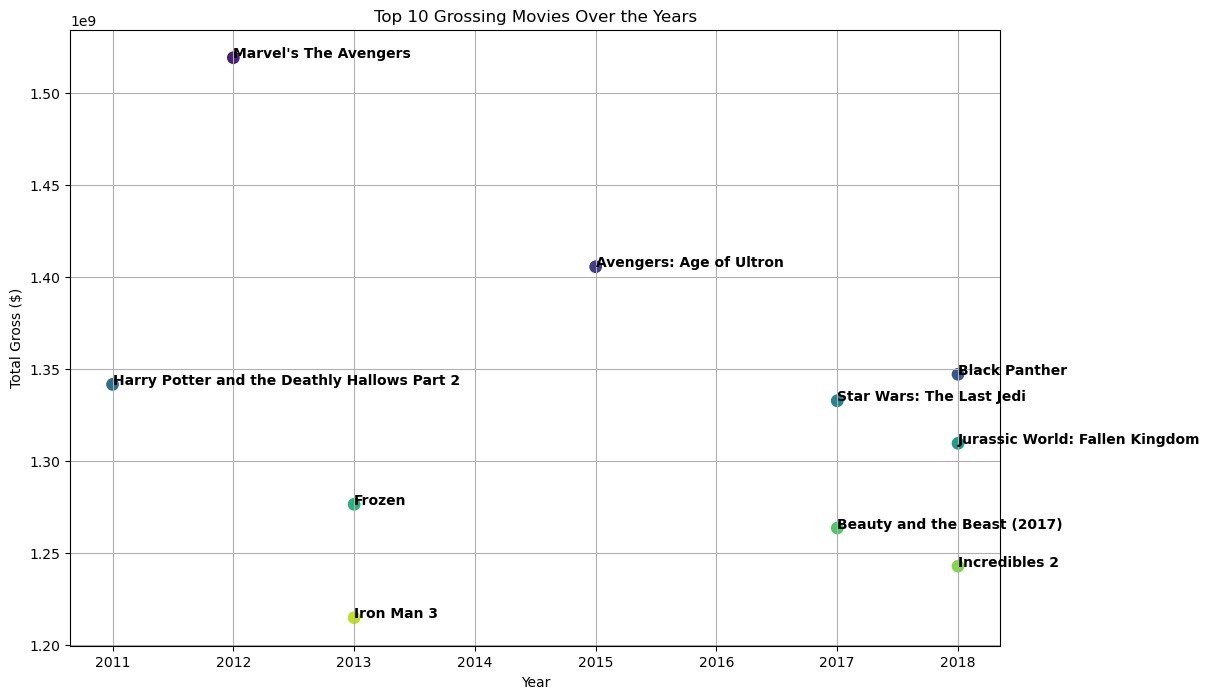

In [22]:
# Data
data = {
    'title': ["Marvel's The Avengers", 'Avengers: Age of Ultron', 'Black Panther', 'Harry Potter and the Deathly Hallows Part 2', 
              'Star Wars: The Last Jedi', 'Jurassic World: Fallen Kingdom', 'Frozen', 'Beauty and the Beast (2017)', 
              'Incredibles 2', 'Iron Man 3'],
    'year': [2012, 2015, 2018, 2011, 2017, 2018, 2013, 2017, 2018, 2013],
    'total_gross': [1.5189e+09, 1.4054e+09, 1.3470e+09, 1.3415e+09, 1.3326e+09, 1.3095e+09, 1.2764e+09, 1.2635e+09, 
                    1.2428e+09, 1.2148e+09]
}

# Convert to DataFrame
import pandas as pd
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='year', y='total_gross', data=df, hue='title', palette='viridis', s=100, legend=False)

# Adding annotations
for i in range(df.shape[0]):
    plt.text(df['year'][i], df['total_gross'][i], df['title'][i], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.xlabel('Year')
plt.ylabel('Total Gross ($)')
plt.title('Top 10 Grossing Movies Over the Years')
plt.grid(True)
plt.show()

Most Grossing Movie Both Domestically and Foreign and the studio

In [18]:

# Converting domestic_gross and foreign_gross to numeric, coercing errors
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'], errors='coerce')
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

# Fillin NaN values with 0 (if appropriate)
df['domestic_gross'] = df['domestic_gross'].fillna(0)
df['foreign_gross'] = df['foreign_gross'].fillna(0)
#Most grossing movie both domestically and Foreign
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']
#Now let us sort this out
df_sorted_total_gross = df.sort_values(by= 'total_gross', ascending=False)
# Selecting the top row, which represents the most grossing movie both domestically and foreign
most_grossing_movie = df_sorted_total_gross.head(1)
# Printing the most grossing movie
result_df = most_grossing_movie[['title', 'studio', 'domestic_gross', 'foreign_gross', 'total_gross', 'year']]
print("Most Grossing Movie Both Domestically and Foreign:")

result_df


Most Grossing Movie Both Domestically and Foreign:


,title,studio,domestic_gross,foreign_gross,total_gross,year
727,Marvel's The Avengers,BV,623400000.0,895500000.0,1.518900e+09,2012


Finding the studio with the most number of movies 


In [40]:
#  number of movies for each studio
studio_counts = df['studio'].value_counts()

# studio with the highest count
most_common_studio = studio_counts.idxmax()
most_common_studio_count = studio_counts.max()

# Display the result
print(f"Studio with the most number of movies:")
print(f"{most_common_studio}: {most_common_studio_count} movies")

Studio with the most number of movies:
IFC: 166 movies


HISTOGRAM ANLYSIS


1.1 The studio with highest domestic gross and foreign gross

In [46]:
# Convert domestic_gross and foreign_gross to numeric, coercing errors
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'], errors='coerce')
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

# Fill NaN values with 0 (if appropriate)
df['domestic_gross'] = df['domestic_gross'].fillna(0)
df['foreign_gross'] = df['foreign_gross'].fillna(0)

# Set the number of top movies to consider
top_n = 10  # You can adjust this number

# Get top N movies by domestic gross
top_n_domestic = df.nlargest(top_n, 'domestic_gross')

# Get top N movies by foreign gross
top_n_foreign = df.nlargest(top_n, 'foreign_gross')

# Count the number of movies for each studio in the top N domestic gross movies
studio_counts_domestic = top_n_domestic['studio'].value_counts()

# Count the number of movies for each studio in the top N foreign gross movies
studio_counts_foreign = top_n_foreign['studio'].value_counts()

# Create a frequency table for domestic gross
frequency_table_domestic = studio_counts_domestic.reset_index()
frequency_table_domestic.columns = ['Studio', 'Number of Top Grossing Movies']

# Create a frequency table for foreign gross
frequency_table_foreign = studio_counts_foreign.reset_index()
frequency_table_foreign.columns = ['Studio', 'Number of Top Grossing Movies']



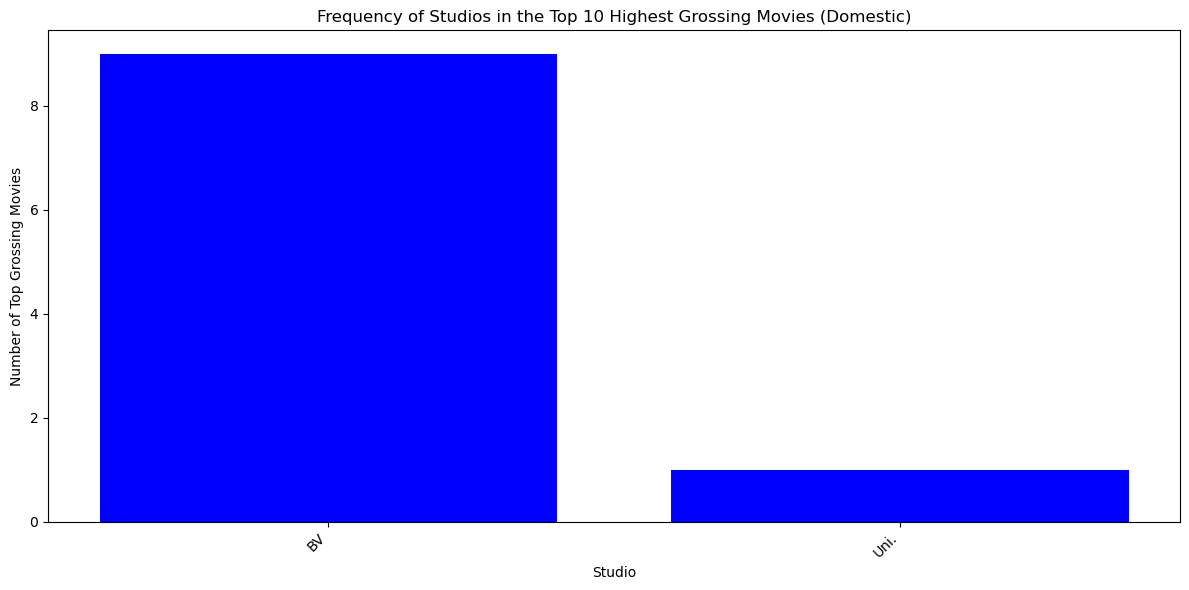

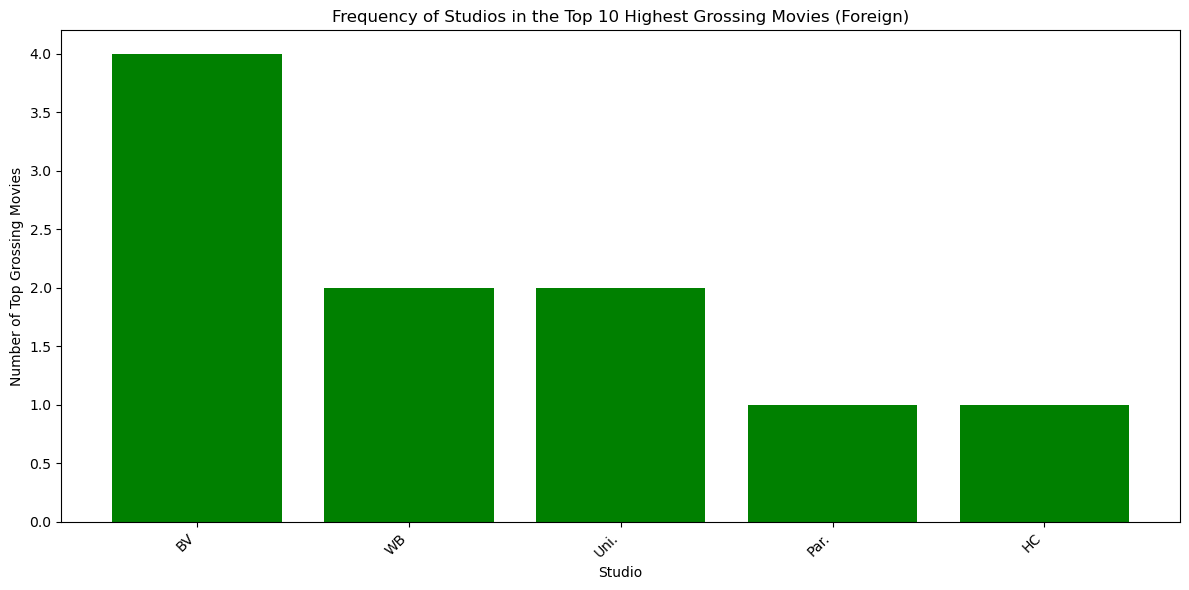

('BV', 9, 'BV', 4)

In [48]:
# Plot the frequency graph for domestic gross
plt.figure(figsize=(12, 6))
plt.bar(frequency_table_domestic['Studio'], frequency_table_domestic['Number of Top Grossing Movies'], color='blue')
plt.title(f'Frequency of Studios in the Top {top_n} Highest Grossing Movies (Domestic)')
plt.xlabel('Studio')
plt.ylabel('Number of Top Grossing Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the frequency graph for foreign gross
plt.figure(figsize=(12, 6))
plt.bar(frequency_table_foreign['Studio'], frequency_table_foreign['Number of Top Grossing Movies'], color='green')
plt.title(f'Frequency of Studios in the Top {top_n} Highest Grossing Movies (Foreign)')
plt.xlabel('Studio')
plt.ylabel('Number of Top Grossing Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Studio with highest domestic gross
highest_domestic_studio = studio_counts_domestic.idxmax()
highest_domestic_count = studio_counts_domestic.max()

# Studio with highest foreign gross
highest_foreign_studio = studio_counts_foreign.idxmax()
highest_foreign_count = studio_counts_foreign.max()

highest_domestic_studio, highest_domestic_count, highest_foreign_studio, highest_foreign_count

In [24]:
import sqlite3
conn= sqlite3.connect('im.db')


In [25]:
cursor = conn.cursor()
# Retrieve the list of tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
# Print the list of tables
print("List of tables in the database:")
for table in tables:
    print(table[0])




List of tables in the database:
movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


In the SQL table, I will work with these two tables movie_basics and movie_ratings 

In [26]:
# Loading the movie_basics table
movie_basics_df = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [28]:
movie_basics_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


Data frame of the movie ratings


In [29]:
# Load the movie_basics table
movie_ratings_df = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [30]:
 #Get descriptive statistics for each column
descriptive_stats = movie_ratings_df.describe()

# Display the descriptive statistics
print(descriptive_stats)

       averagerating      numvotes
count   73856.000000  7.385600e+04
mean        6.332729  3.523662e+03
std         1.474978  3.029402e+04
min         1.000000  5.000000e+00
25%         5.500000  1.400000e+01
50%         6.500000  4.900000e+01
75%         7.400000  2.820000e+02
max        10.000000  1.841066e+06


In [31]:
# Load the movie_basics table
movie_basics_df = pd.read_sql_query("SELECT * FROM movie_basics", conn)

# Calculate the percentage of missing values for each column
missing_percentage = movie_basics_df.isnull().mean() * 100

# Display the percentage of missing values for each column
print(missing_percentage)

movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64


2.0 Movie Ratings table

Finding the percentage of missing values in each column of the movie ratings data frame

In [32]:
# Load the movie_basics table
movie_ratings_df = pd.read_sql_query("SELECT * FROM movie_ratings", conn)

# Calculate the percentage of missing values for each column
missing_percentage = movie_ratings_df.isnull().mean() * 100

# Display the percentage of missing values for each column
print(missing_percentage)

movie_id         0.0
averagerating    0.0
numvotes         0.0
dtype: float64


The movie ratings table has no missing entries.
 -This means that no cleaning needed.

Merging the two tables using  JOIN query and filling in th missing entries for each column
This will help in efficient analysis, cleansing of the data and combining data.
For example, from the data base, the movie id column in the two tables, movie basics and movie rating had to be merged and the two columns from the movie ratings, (averagerating  and numvotes ) being only two columns merged into the tabel movie basics.

In [33]:
#connection to the database
conn = sqlite3.connect('im.db')

#the SQL query to join the tables
query = """
SELECT mb.movie_id, 
       mb.primary_title, 
       mb.original_title, 
       mb.start_year, 
       mb.runtime_minutes, 
       mb.genres, 
       mr.averagerating, 
       mr.numvotes
FROM movie_basics mb
LEFT JOIN movie_ratings mr ON mb.movie_id = mr.movie_id;
"""

merged_df_sql = pd.read_sql_query(query, conn)
merged_df_sql


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


Filling in each column on the joined table with None or NaN entries

In [35]:


# Replace NaN values in 'runtime_minutes' column with the mean of the column
mean_runtime = merged_df_sql['runtime_minutes'].mean()
merged_df_sql['runtime_minutes'].fillna(mean_runtime, inplace=True)

# Replace NaN values in 'averagerating' column with the mean of the column
mean_rating = merged_df_sql['averagerating'].mean()
merged_df_sql['averagerating'].fillna(mean_rating, inplace=True)

# Replace NaN values in 'numvotes' column with the mean of the column
mean_numvotes = merged_df_sql['numvotes'].mean()
merged_df_sql['numvotes'].fillna(mean_numvotes, inplace=True)

# Replace NaN values in 'genres' column with 'Unknown'
merged_df_sql['genres'].fillna('Unknown', inplace=True)

#  DataFrame after replacing NaN values
merged_df_sql


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.000000,77.000000
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.200000,43.000000
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.900000,4517.000000
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama",6.100000,13.000000
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.500000,119.000000
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.000000,Drama,6.332729,3523.662167
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,86.187247,Documentary,6.332729,3523.662167
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,86.187247,Comedy,6.332729,3523.662167
146142,tt9916730,6 Gunn,6 Gunn,2017,116.000000,Unknown,6.332729,3523.662167


VISUALIZATION ON THE im.db data base

A) Bar Chart of Average Ratings by Genre

In [6]:
# spiliting the genres
genre_split = merged_df_sql['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)

# Joining the split genres back to the DataFrame
merged_df_sql_genres = merged_df_sql.drop('genres', axis=1).join(genre_split.rename('genre'))

# Calculating the average rating for each genre
genre_avg_rating = merged_df_sql_genres.groupby('genre')['averagerating'].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
genre_avg_rating.plot(kind='bar', color='skyblue')
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NameError: name 'merged_df_sql' is not defined

B)Histogram of Runtime
 Visualize the distribution of movie runtimes using a histogram. This will show how many movies fall into different runtime ranges.


In [5]:
# DataFrame is named merged_df_sql and is already loaded with the given data and  Split the genres into separate rows

genres_split = merged_df_sql['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
merged_df_sql_genres = merged_df_sql.drop('genres', axis=1).join(genres_split.rename('genre'))

# Calculating the average rating and average runtime for each genre
genre_stats = merged_df_sql_genres.groupby('genre').agg({
    'averagerating': 'mean',
    'runtime_minutes': 'mean'
}).reset_index()

# Sorting the genres by average rating and select the top 10
top_10_genres = genre_stats.sort_values(by='averagerating', ascending=False).head(10)

# Ploting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top_10_genres['runtime_minutes'], top_10_genres['averagerating'], alpha=0.7, s=100, c='skyblue')

for i in range(len(top_10_genres)):
    plt.annotate(top_10_genres['genre'].iloc[i], 
                 (top_10_genres['runtime_minutes'].iloc[i], top_10_genres['averagerating'].iloc[i]))

plt.title('Top 10 Genres by Average Rating and their Average Runtime')
plt.xlabel('Average Rating)') 'Average Runtime (minutes)
plt.ylabel('Average Runtime (minutes)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

SyntaxError: EOL while scanning string literal (1608502085.py, line 24)

C) Heatmap correlation.
 Visualizing the correlation between numeric variables such as runtime, average rating, and number of votes. This will help understand how these variables are related to each other.

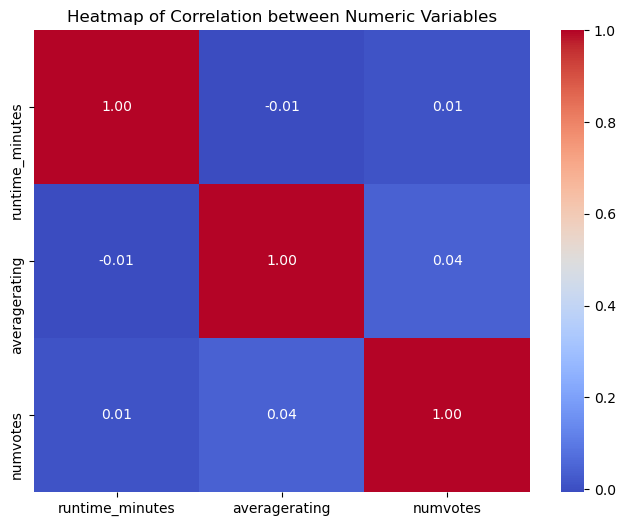

In [40]:


# Extracting numerical columns for correlation analysis
numeric_columns = ['runtime_minutes', 'averagerating', 'numvotes']
numeric_data = merged_df_sql[numeric_columns]

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=numeric_columns, yticklabels=numeric_columns)

# Setting the title
plt.title('Heatmap of Correlation between Numeric Variables')

# Displaying the plot
plt.show()

Line Plot of Average Ratings Over Time

 Plot the average ratings of movies over time to see if there are any trends or patterns in how ratings have changed over the years

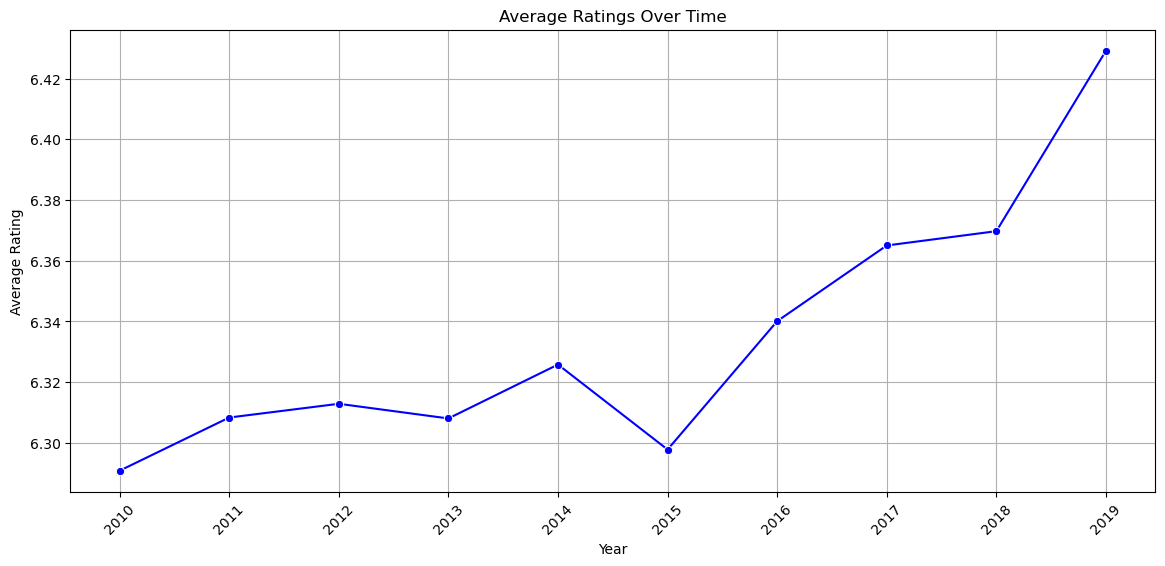

In [49]:
merged_df = merged_df_sql

# Grouping the data by 'start_year' and calculating the mean of 'averagerating'
average_ratings_over_time = merged_df.groupby('start_year')['averagerating'].mean().reset_index()

# Filtering data for the years 2010 to 2019
average_ratings_over_time = average_ratings_over_time[(average_ratings_over_time['start_year'] >= 2010) & 
                                                      (average_ratings_over_time['start_year'] <= 2019)]

# Plotting the line plot
plt.figure(figsize=(14, 6))  # Adjust the figure size to accommodate all years

sns.lineplot(data=average_ratings_over_time, x='start_year', y='averagerating', marker='o', color='blue', linestyle='-')

plt.title('Average Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)

# Set x-ticks to display every year from 2010 to 2019
years = range(2010, 2020)
plt.xticks(years, rotation=45)

plt.show()

Graphical representtion of the top 10 genrs with the highest rating

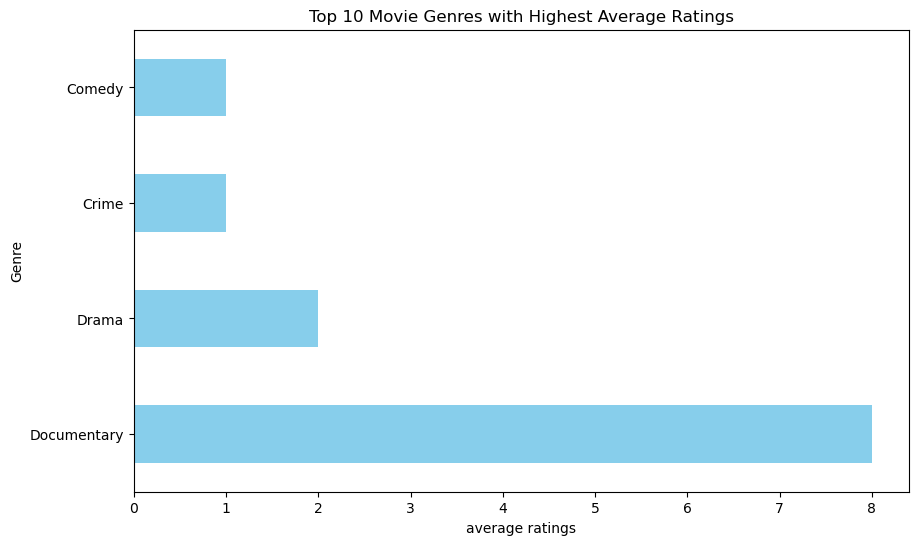

In [59]:
# Sorted data frame in by averaging the data frame in ascending order 
top_movies = merged_df.nlargest(10, 'averagerating')

# Extract the genres of the top 10 movies
genres_list = top_movies['genres'].str.split(',').explode()

# Count the occurrences of each genre
genre_counts = genres_list.value_counts()

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='barh', color='skyblue')
plt.xlabel('average ratings')

plt.ylabel('Genre')
plt.title('Top 10 Movie Genres with Highest Average Ratings')

plt.show()

As per the im.db data set it is clear that the documentary has  the highest number of ratings however, it does not directly indicate that is the most profiting genre

ANALYSIS DONE

In [1]:
pip install seaborn

Last changes done

Jupyter noteboon in pdf